In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import numpy as np

Using TensorFlow backend.


In [2]:
pos_doc = open("D:/数据/sentiment/rt-polarity-pos.txt","r",encoding='utf8',errors='replace').read()
neg_doc = open("D:/数据/sentiment/rt-polarity-neg.txt","r",encoding='utf8',errors='replace').read()

print(type(pos_doc))

<class 'str'>


In [3]:
x_pos = []
x_neg = []

for p in pos_doc.split('\n'):
    x_pos.append(p)

for n in neg_doc.split('\n'):
    x_neg.append(n)

In [4]:
y_pos = []
y_neg = []

for i in range(len(x_pos)):
    y_pos.append(1)

for j in range(len(x_neg)):
    y_neg.append(0)

pos = zip(x_pos,y_pos)
neg = zip(x_neg,y_neg)

In [5]:
pos = list(pos)
neg = list(neg)
print(pos[0])

('the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . ', 1)


In [6]:
data = []
for p in pos:
    data.append(p)
for n in neg:
    data.append(n)

np.random.shuffle(data)
print(len(pos))
print(len(data))

5332
10664


In [7]:
from keras.preprocessing.text import Tokenizer

In [8]:
encoded_docs = []
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(x_pos + x_neg)
vocab_size = max(tokenizer.word_index.values())
print(vocab_size)

for i in range(len(data)):
    encoded_docs.append(one_hot(data[i][0],vocab_size))
print(encoded_docs[0])
print("---")
print(data[0][0])

19489
[2324, 6823, 9593, 18957, 13668, 13401, 6171, 7624, 15052, 13668, 1394, 16649, 2330, 4145, 9701, 9593, 17771, 9593, 4698, 9086, 11005, 9369, 12824, 11858]
---
it's rare to see a movie that takes such a speedy swan dive from " promising " to " interesting " to " familiar " before landing squarely on " stupid " . 


In [9]:
max_len = max([len(encoded_docs[i]) for i in range(len(encoded_docs))])
max_len

51

In [10]:
padded_docs = pad_sequences(encoded_docs,maxlen=max_len,padding='post')
print(padded_docs[0])

[ 2324  6823  9593 18957 13668 13401  6171  7624 15052 13668  1394 16649
  2330  4145  9701  9593 17771  9593  4698  9086 11005  9369 12824 11858
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]


In [11]:
y = [data[i][1] for i in range(len(data))]
y[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [12]:
train_size = int(0.87*len(padded_docs))
X_train = padded_docs[:train_size]
X_test = padded_docs[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

## define the model

In [13]:
from keras.layers import LSTM,Dropout
from keras.optimizers import Adam

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.02)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 51, 128)           2494592   
_________________________________________________________________
flatten_1 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1671424   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 4,199,041
Trainable params: 4,199,041
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.evaluate(X_test,y_test)

1387/1387 [==============================] - 0s 298us/step


[0.6936749210440176, 0.4931506850174544]

In [17]:
epochs=10
hist = model.fit(X_train,y_train,epochs=epochs,batch_size=256)

Epoch 1/10
9277/9277 [==============================] - 6s 683us/step - loss: 1.0362 - acc: 0.5659
Epoch 2/10
9277/9277 [==============================] - 6s 625us/step - loss: 0.3059 - acc: 0.8699
Epoch 3/10
9277/9277 [==============================] - 6s 659us/step - loss: 0.0536 - acc: 0.9819
Epoch 4/10
9277/9277 [==============================] - 6s 700us/step - loss: 0.0114 - acc: 0.9964
Epoch 5/10
9277/9277 [==============================] - 7s 712us/step - loss: 0.0048 - acc: 0.9983
Epoch 6/10
9277/9277 [==============================] - 6s 641us/step - loss: 0.0071 - acc: 0.9982
Epoch 7/10
9277/9277 [==============================] - 6s 661us/step - loss: 0.0087 - acc: 0.9970
Epoch 8/10
9277/9277 [==============================] - 6s 627us/step - loss: 0.0110 - acc: 0.9970
Epoch 9/10
9277/9277 [==============================] - 6s 649us/step - loss: 0.0045 - acc: 0.9987
Epoch 10/10
9277/9277 [==============================] - 6s 625us/step - loss: 0.0014 - acc: 0.9998


In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

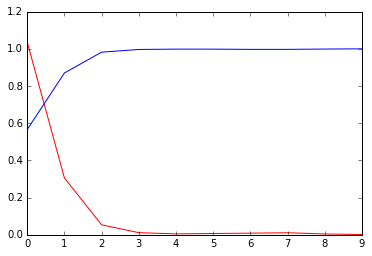

In [19]:
loss = hist.history["loss"]
acc = hist.history["acc"]

plt.plot(loss,'r-')
plt.plot(acc,'b-')

In [20]:
model.evaluate(X_test,y_test)

1387/1387 [==============================] - 0s 171us/step


[2.026091897066497, 0.7029560203163763]